# 의사결정나무

In [60]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [61]:
df_raw = pd.read_csv("/home/piai/강의자료/Datahandling/2. Big Data 분석/유방암.csv", encoding='euc-kr' )
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [62]:
df_raw['diagnosis'] = df_raw['diagnosis'].replace({'양성': 1, '음성': 0})

In [63]:
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [64]:
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4, random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


### 기본옵션으로 모델 생성

In [65]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


모델 정확도는 train 100%, test 88.3%로 과적합

### 최대 깊이 변경에 따른 모델 성능

In [66]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [67]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


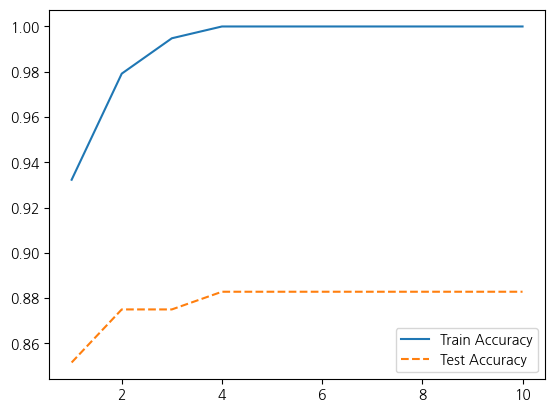

In [68]:
plt.plot(para_depth,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.legend()

Depth가 4일 때 부터 test의 정확도가 0.883으로 고정이다. 따라서 4로 지정했다.

In [69]:
v_feature_name = df_train_x.columns

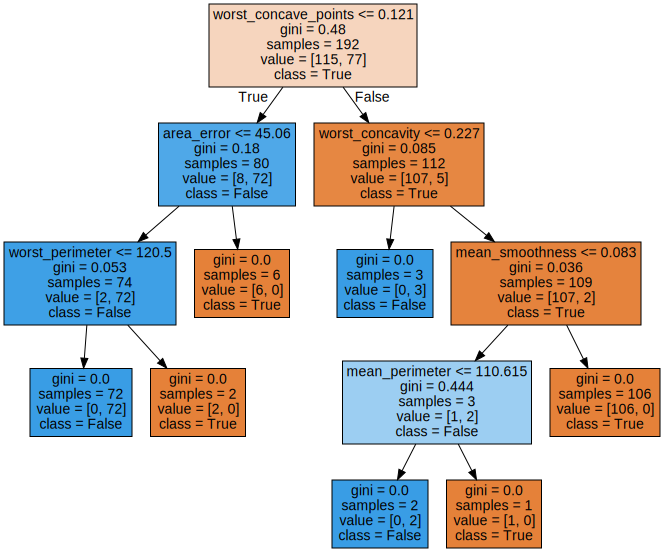

In [70]:
tree_low = DecisionTreeClassifier(max_depth = 4,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["True","False"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [71]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [72]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


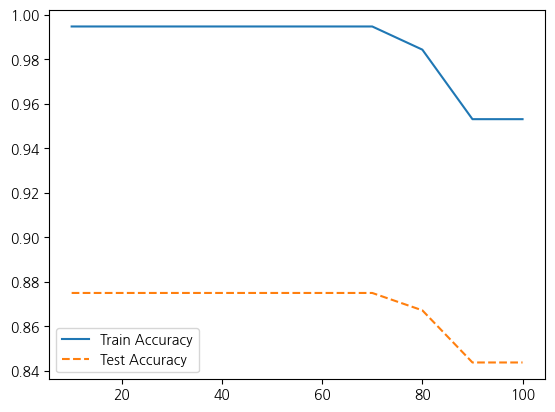

In [73]:
plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.legend()

MinSamplesSplit이 70까지 test의 정확도가 같다. 너무 큰 수는 과소적합을 불러 일으키므로 25를 선택했다.

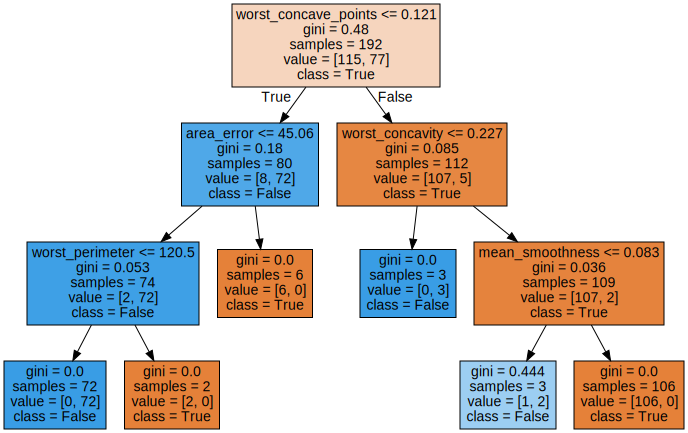

In [74]:
tree_low = DecisionTreeClassifier(max_depth = 4,min_samples_split = 25,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["True","False"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [75]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf= v_min_samples_leaf,min_samples_split = 25, max_depth = 4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [76]:
df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy
0,2,0.995,0.875
1,4,0.974,0.891
2,6,0.964,0.875
3,8,0.958,0.898
4,10,0.953,0.914
5,12,0.943,0.906
6,14,0.932,0.898
7,16,0.932,0.852
8,18,0.932,0.852
9,20,0.932,0.852


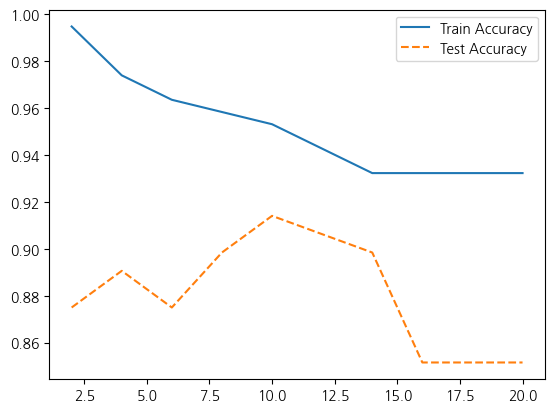

In [77]:
plt.plot(para_leaf,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.legend()

test의 정확도가 10일 때 가장 크다. 따라서 MinSamplesleaf 10으로 지정했다.

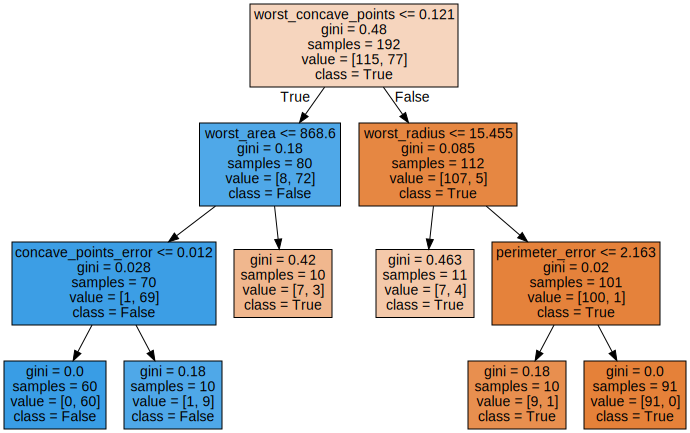

In [78]:
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split = 25, min_samples_leaf = 10,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["True","False"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [79]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 10, min_samples_split = 25, max_depth = 4, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=25,
                       random_state=1234)

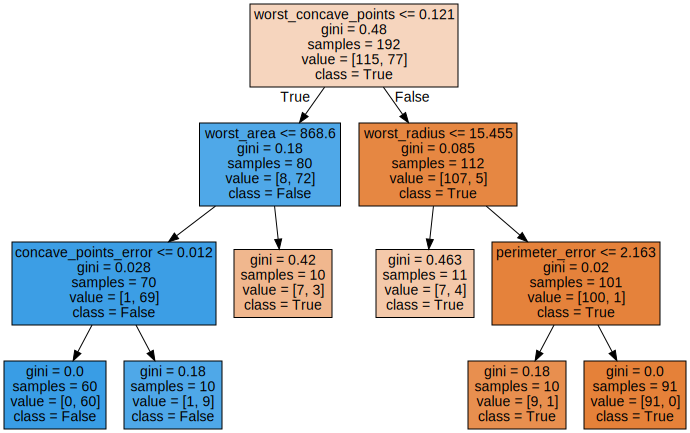

In [80]:
export_graphviz(tree_final, out_file = "tree_final.dot", class_names = ["True","False"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

트리 분리에 영향이 큰 변수는 worst_concave_points, worst_area, worst_radius 등이 있다.  
worst_concave_points <= 0.121이면 True(자료 수 = 80, Negative 비율이 증가하고 gini지수는 감소한다.)  
worst_concave_points > 0.121이면 False(자료 수 = 112, Positive 비율이 증가하고 gini지수는 감소한다.)


In [81]:
y_pred = tree_final.predict(df_test_x)

print("Accuray: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuray: 0.914

Confusion matrix:
[[94  3]
 [ 8 23]]


Test 데이터 기준 정분류율은 91.4% 이다.  
음성을 음성으로 분류한 것이 94개 음성을 양성으로 분류한 것이 8개 양성을 음성으로 분류한 것이 3개 양성을 양성으로 분류한 것이 23개이다.

In [82]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.922     0.969     0.945        97
           1      0.885     0.742     0.807        31

    accuracy                          0.914       128
   macro avg      0.903     0.856     0.876       128
weighted avg      0.913     0.914     0.911       128



In [83]:
v_feature_name = df_train_x.columns


df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = tree_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
27,worst_concave_points,0.861
23,worst_area,0.104
20,worst_radius,0.031
12,perimeter_error,0.002
17,concave_points_error,0.002
0,mean_radius,0.000
16,concavity_error,0.000
28,worst_symmetry,0.000
26,worst_concavity,0.000
25,worst_compactness,0.000


Text(0, 0.5, '설명변수')

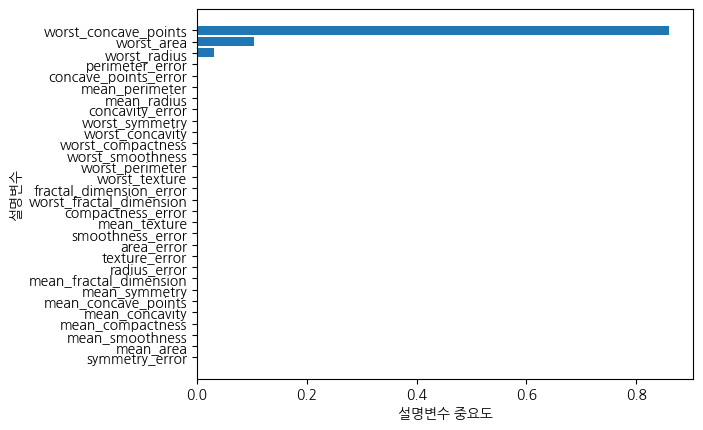

In [84]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

트리 분리에 영향이 큰 변수는 worst_concave_points, worst_area, worst_radius 등이 있다.  
훈련 데이터나 모델에 따라 설명변수의 중요도는 변경될 수 있다.

# Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

### 기본옵션으로 모델 생성

In [86]:
rf_uncustomized = DecisionTreeClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


모델 정확도는 train 100%, test 88.3%로 과적합

In [87]:
print(rf_uncustomized.get_params().keys())
print(rf_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


### 트리 수 변경에 따른 모델 성능

In [88]:
train_accuracy = []; test_accuracy = []

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["n_estimators"] = para_n_tree
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

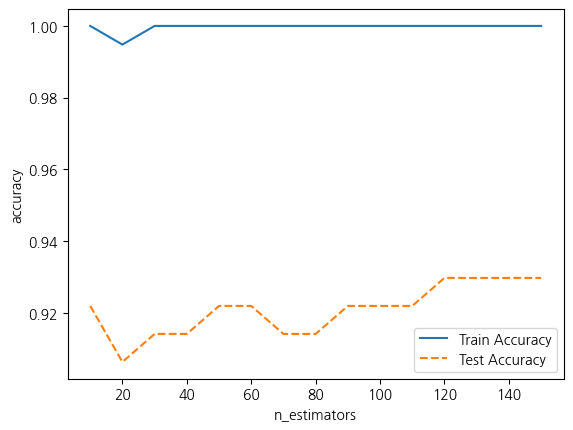

In [89]:
plt.plot(para_n_tree,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

### 트리 수 변경에 따른 모델 oob error 변화

In [90]:
oob_error = []

for v_n_estimators in range(1,151):
    rf = RandomForestClassifier(n_estimators = v_n_estimators, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

트리 수 변경에 따른 모델 oob error 변화이다.  

Text(0.5, 0, 'n_estimators')

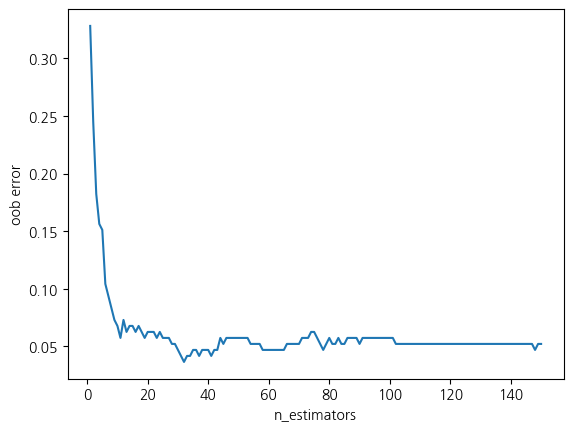

In [91]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

결정 트리 수 증가에 따라 oob error가 감소하는 것을 볼 수 있다. 100 근처에 수렴하여 105로 지정했다.

### 최대 깊이 변경에 따른 모델 성능

In [92]:
train_accuracy = []; test_accuracy = []

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 105,random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [93]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.948,0.914
1,2,0.974,0.906
2,3,0.990,0.914
3,4,1.000,0.914
4,5,1.000,0.922
5,6,1.000,0.922
6,7,1.000,0.922
7,8,1.000,0.922
8,9,1.000,0.922
9,10,1.000,0.922


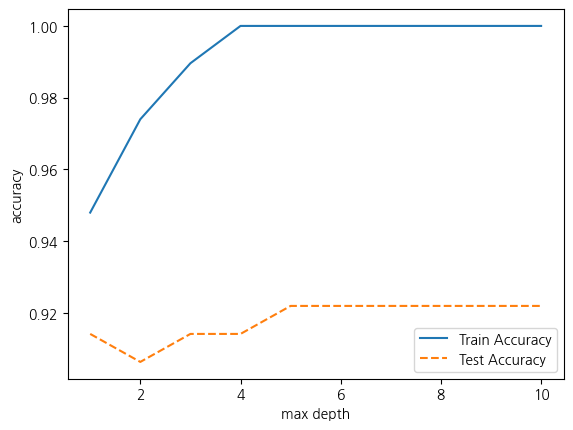

In [94]:
plt.plot(para_depth,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

max_depth = 5

depth가 5일 때 test의 정확도가 가장 높아서 5로 지정했다.

### 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [95]:
train_accuracy = []; test_accuracy = []

para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 5,
                                n_estimators = 105, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [96]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.906
1,20,0.984,0.914
2,30,0.984,0.914
3,40,0.984,0.906
4,50,0.979,0.891
5,60,0.969,0.883
6,70,0.948,0.891
7,80,0.948,0.914
8,90,0.948,0.914
9,100,0.948,0.914


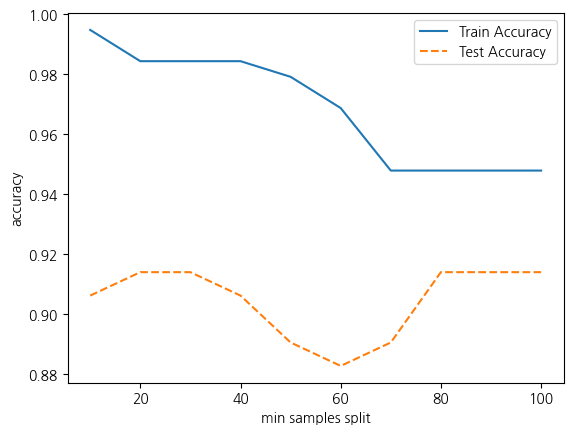

In [97]:
plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

MinSamplesSplit이 30일 때 80이상일 때 테스트의 정확도가 0.914로 제일 크다. 과소적합의 위험 때문에 30으로 지정했다.

### 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [98]:
train_accuracy = []; test_accuracy = []

para_leaf = [n_leaf * 5 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf= v_min_samples_leaf,min_samples_split = 30, max_depth = 5,
                                n_estimators = 105, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesleaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [99]:
df_accuracy_leaf.round(3)

,MinSamplesleaf,TrainAccuracy,TestAccuracy
0,5,0.974,0.914
1,10,0.974,0.906
2,15,0.958,0.906
3,20,0.958,0.914
4,25,0.953,0.906
5,30,0.964,0.898
6,35,0.948,0.914
7,40,0.948,0.914
8,45,0.958,0.906
9,50,0.964,0.906


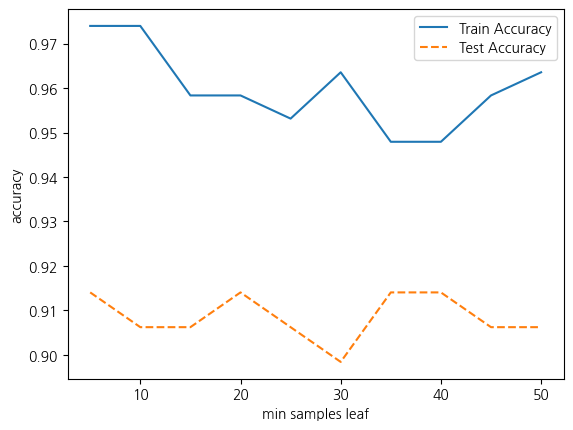

In [100]:
plt.plot(para_leaf,train_accuracy,linestyle = "-",label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle = "--",label = "Test Accuracy")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()
min_samples_leaf = 20

MinSamplesleaf가 5, 20, 35, 40일 때 테스트의 정확도가 제일 높다. 과소적합과 과대적합의 위험으로 인해서 20을 지정했다.

In [101]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, min_samples_split = 30, max_depth = 5,n_estimators = 105,  random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuray on training set: {:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Accuray on test set: {:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuray on training set: 0.953

Accuray on test set: 0.914

Confusion matrix:
[[92  5]
 [ 6 25]]


Test 데이터 기준 정분류율은 91.4% 이다.
음성을 음성으로 분류한 것이 92개 음성을 양성으로 분류한 것이 6개 이다. 양성을 음성으로 분류한 것이 5개 양성을 양성으로 분류한 것이 25개이다.


In [102]:
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.939     0.948     0.944        97
           1      0.833     0.806     0.820        31

    accuracy                          0.914       128
   macro avg      0.886     0.877     0.882       128
weighted avg      0.913     0.914     0.914       128



In [103]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = rf_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
22,worst_perimeter,0.158
7,mean_concave_points,0.145
6,mean_concavity,0.132
27,worst_concave_points,0.123
20,worst_radius,0.095
23,worst_area,0.077
26,worst_concavity,0.064
2,mean_perimeter,0.051
0,mean_radius,0.040
3,mean_area,0.032


Text(0, 0.5, '설명변수')

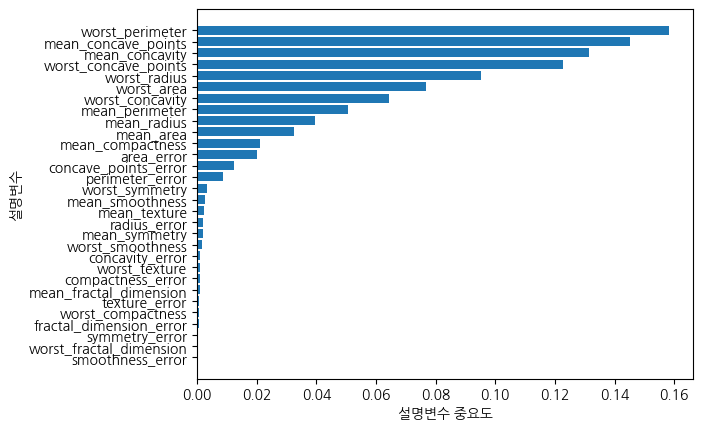

In [104]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

트리 분리에 영향이 큰 변수는 worst_perimeter, mean_concave_points, mean_concavity, worst_concave_points 등이 있다.  
선택되는 훈련 데이터나 모델에 따라 설명변수의 중요도는 변경될 수 있다.
